**https://poloclub.github.io/cnn-explainer/**

In [1]:
import torch #for using tensors
import torch.nn as nn # creating neural network
import torch.nn.functional as F # recallable functions like relu,sigmoid and etc.
import torchvision # subpackage for vision models
import torchvision.transforms as transforms # image augmentation
import torch.optim as optim # optimisation functions like sgd, adam
from torch.utils.data import DataLoader # creating a data loader
from torchvision.transforms import ToTensor # converting image to tensor
import matplotlib.pyplot as plt 

In [2]:
# PyTorch kitabxanasını yükləyir, tensor əməliyyatlarını və dərin öyrənmə üçün əsas modulları təmin edir
import torch
# Neyron şəbəkələr qurmaq üçün PyTorch-un `nn` modulunu yükləyir
import torch.nn as nn 
# Neyron şəbəkələrdə müxtəlif funksiyalardan istifadə etmək üçün `nn.functional` modulunu yükləyir
import torch.nn.functional as F 
# PyTorch-da kompüter görmə layihələri üçün faydalı modullar təmin edən `torchvision` kitabxanasını yükləyir
import torchvision 
# Şəkillərə əvvəlcədən emal transformasiyaları tətbiq etmək üçün `transforms` modulunu yükləyir
import torchvision.transforms as transforms 
# PyTorch-da optimizasiya alqoritmləri (məsələn, SGD, Adam) üçün `optim` modulunu yükləyir
import torch.optim as optim 
# DataLoader PyTorch-da məlumat dəstlərini daha asan idarə etmək üçün istifadə olunur (məlumat dəstlərini 
#                                                                                     qruplaşdırır, sıraya qoyur)
from torch.utils.data import DataLoader 
# Şəkilləri tensor formatına çevirmək üçün `ToTensor` funksiyasını `transforms` modulundan yükləyir
from torchvision.transforms import ToTensor 
# Nəticələri görselləşdirmək üçün Matplotlib kitabxanasını yükləyir
import matplotlib.pyplot as plt 

### FashionMNIST data

In [3]:
import torchvision
from torchvision.transforms import ToTensor

# Download training data from open datasets.
training_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

### Plot Labels

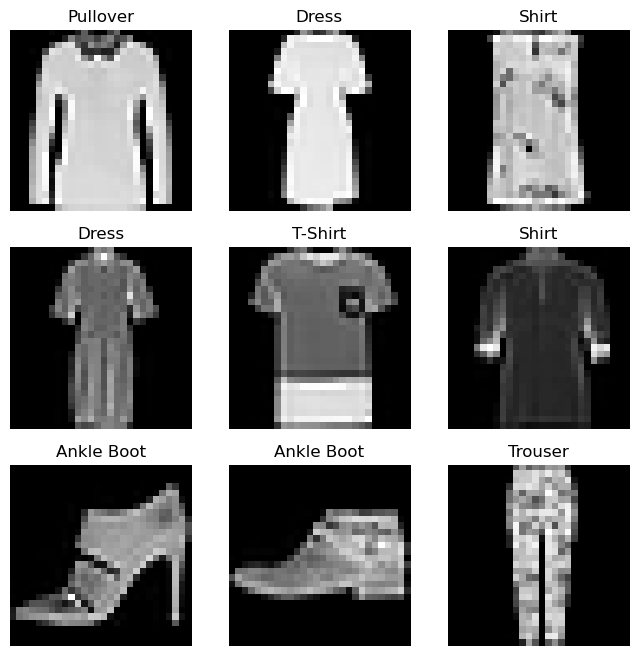

In [45]:
# Label dəyərlərini insan üçün oxunaqlı formada göstərmək üçün xəritə
labels_map = {
    0: "T-Shirt",   # 0 etiketini "T-Shirt" olaraq göstərir
    1: "Trouser",   # 1 etiketini "Trouser" olaraq göstərir
    2: "Pullover",  # 2 etiketini "Pullover" olaraq göstərir
    3: "Dress",     # 3 etiketini "Dress" olaraq göstərir
    4: "Coat",      # 4 etiketini "Coat" olaraq göstərir
    5: "Sandal",    # 5 etiketini "Sandal" olaraq göstərir
    6: "Shirt",     # 6 etiketini "Shirt" olaraq göstərir
    7: "Sneaker",   # 7 etiketini "Sneaker" olaraq göstərir
    8: "Bag",       # 8 etiketini "Bag" olaraq göstərir
    9: "Ankle Boot" # 9 etiketini "Ankle Boot" olaraq göstərir
}

# Şəkil ölçüsünü təyin etmək üçün 8x8 ölçülü bir qrafik paneli yaradır
figure = plt.figure(figsize=(8, 8))

# Paneldə 3 sütun və 3 sətir yaratmaq üçün dəyişənləri təyin edir
cols, rows = 3, 3

# 9 təsadüfi şəkil seçərək onları təsvir etmək üçün dövrə başlayır
for i in range(1, cols * rows + 1):
    # Dataset-dən təsadüfi bir nümunənin indeksini seçir
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    
    # Seçilmiş nümunənin şəkil və etiket məlumatını alır
    img, label = training_data[sample_idx]
    
    # Yeni bir alt qrafik (subplot) əlavə edir
    figure.add_subplot(rows, cols, i)
    
    # Alt qrafikə şəkilin kateqoriya adını başlıq kimi əlavə edir
    plt.title(labels_map[label])
    
    # Şəkil ətrafında oxları gizlədir
    plt.axis("off")
    
    # Şəkli boz rəng xəritəsində göstərir
    plt.imshow(img.squeeze(), cmap="gray")

# Bütün şəkilləri bir paneldə göstərir
plt.show()

### One Picture Plot according to the index

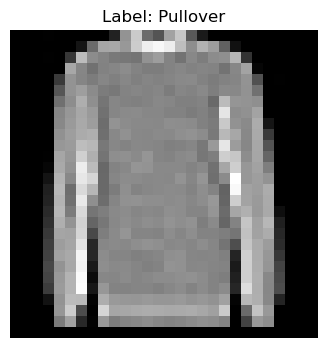

In [56]:
def plot_mnist_sample(index, mnist_dataset):
    # İndeksə əsasən MNIST datasetindən şəkil və müvafiq etiketi çıxarır.
    image, label = mnist_dataset[index]
    # Şəkil tensorunu NumPy array-ə çevirir.
    image = image.numpy()
    # Matplotlib istifadə edərək şəkili çəkmək üçün yeni bir figure yaradır.
    plt.figure(figsize=(4, 4))  # Figure-in ölçüsünü 4x4 düym ölçüsündə təyin edir.
    # Şəkili gray (boz) rəng palitrasında göstərir. image[0] istifadə edilir, çünki MNIST şəkilləri 3D tensor formasındadır (1, 28, 28).
    plt.imshow(image[0], cmap='gray')  # Şəkil (28x28) ölçüsündədir və grayscale olaraq göstərilir.
    # Şəkilin başlığını, yəni müvafiq etiketi göstərir.
    plt.title(f"Label: {labels_map[label]}")
    # Koordinat oxlarını gizlədir (x və y oxlarını göstərməmək üçün).
    plt.axis('off')  # Koordinat oxlarını göstərməmək üçün.
    # Şəkili göstərir.
    plt.show()  # Şəkili ekrana çıxarır.

plot_mnist_sample(45, training_data)    

### Shape one picture

In [4]:
test_data[0][0].shape
# test data is already formed as a tensor dataset which means it has 2 dimensions 
# first dimension is X variable ( images pixel values)
# second one is it's label in which it is going to learn 
# when we write test_data[0] we are calling the first images X and y values
# when we write test_data[0][0] we are calling first images X only and test_data[0][1] we are calling it's y
# X variable has got 3 dimension 
# 1'st one is collor chanel
# 2'nd and 3rd ones are height and width pixel counts
# in this case we have gray scale image with 28x28 pixel dimension

# test_data artıq tensor məlumat dəsti kimi formalaşdırılıb, yəni 2 ölçüyə malikdir
# birinci ölçü X dəyişəni (şəkillərin piksel dəyərləri)
# ikincisi isə onun etiketidir, yəni hansı sinifdə öyrəniləcəyidir
# test_data[0] yazanda, birinci şəkilin X və y dəyərlərini çağırırıq
# test_data[0][0] yazanda isə yalnız birinci şəkilin X dəyərini, test_data[0][1] yazanda isə onun y etiketini çağırırıq
# X dəyişəni 3 ölçüyə malikdir
# birinci ölçü rəng kanalını təmsil edir
# ikinci və üçüncü ölçülər isə hündürlük və en piksel sayıdır
# bu halda, bizdə 28x28 piksel ölçüdə boz tonlu (gray scale) bir şəkil var

torch.Size([1, 28, 28])

### Set Batch size 

In [5]:
# Hypers
batch_size = 64

### Train vs Test Data with batch size

In [6]:
from torch.utils.data import DataLoader

# Təlim məlumat dəstini yükləmək üçün DataLoader obyektini təyin edir
# training_data - təlim məlumatlarıdır
# shuffle=True - təlim məlumatlarını hər dövrədə qarışdırır
# batch_size=batch_size - təlim zamanı məlumatları `batch_size` ölçüsündə paketlərə ayırır
train_loader = DataLoader(training_data, shuffle=True, batch_size=batch_size)

# Test məlumat dəstini yükləmək üçün DataLoader obyektini təyin edir
# test_data - test məlumatlarıdır
# shuffle=True - test məlumatlarını qarışdırır, test zamanı müxtəlif məlumatları təsadüfi sırada yoxlayır
test_loader = DataLoader(test_data, shuffle=True)

# data loader is a tool which defines how our data will get into the model
# in training fase we should define batch_size for increasing the model's speed and reducing underfiting 
# but in testing fase it is not necessary as we will not do backprop

# DataLoader - verilənlərin modelə necə daxil olacağını müəyyən edən bir alətdir
# Təlim mərhələsində modelin sürətini artırmaq və underfitting-i azaltmaq üçün batch_size təyin edilməlidir
# Lakin test mərhələsində batch_size təyin etmək zəruri deyil, çünki bu mərhələdə backprop (geri yayılma) aparılmır

In [7]:
#     0: "T-Shirt",
#     1: "Trouser",
#     2: "Pullover",
#     3: "Dress",
#     4: "Coat",
#     5: "Sandal",
#     6: "Shirt",
#     7: "Sneaker",
#     8: "Bag",
#     9: "Ankle Boot",

In [8]:
# train_loader-dəki verilənləri dövrə ilə oxuyur
for x, y in train_loader:
    # İlk batch-dəki giriş verilənlərinin formasını çap edir
    print(x.shape)
    # İlk batch-dəki hədəf etiketlərini çap edir
    print(y)
    # Yalnız ilk batch-i göstərir və dövrəni dayandırır
    break

torch.Size([64, 1, 28, 28])
tensor([1, 1, 1, 7, 7, 0, 4, 2, 6, 3, 5, 7, 1, 9, 6, 1, 3, 9, 2, 8, 6, 2, 0, 2,
        8, 5, 0, 7, 6, 8, 8, 8, 7, 2, 8, 8, 3, 8, 9, 0, 8, 6, 3, 3, 3, 2, 9, 1,
        7, 0, 3, 8, 0, 4, 1, 6, 8, 1, 2, 6, 4, 5, 7, 4])


## Modelling

### Creat Model

In [9]:
import torch.nn as nn
import torch.nn.functional as F 

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()# first 3 lines is mandatory for inheriting properties of model
# conv layer are special layer's which uses filter for collectiong various information from images
# in_channels on first layer should be number of colur channels in our case it is 1
# kernel size is a size of filter matrix 5x5 in this case
# padding adds a pixel in every direction in oorder learning corner's better
# stride is defining movement of kernel. default is 1
# image size after each conv layer is detected by s = (Si-filter_size+2*padding)/stride + 1
# and after pooling if we use 2,2 it will shrink from every side 2 times
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=64,kernel_size=5,padding=2)
        self.conv2 = nn.Conv2d(64,128,kernel_size=5,stride=2,padding=2)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(128*7*7,512)
        self.fc2 = nn.Linear(512,512)
        self.out = nn.Linear(512,10)
        self.drop_out = nn.Dropout()
    def forward(self,X):
        # input image size is [1,28,28]
        X = self.conv1(X)
        # after first layer of conv z absis will get number from out_channels (64)
        # (28-5+2*2)/1+1 -> 28
        # our result will be [64,28,28]
        X = self.conv2(X)
        # out_channel is 128
        # (28-5+2*2)/2 + 1 ->14.5 aka 14
        # [128,14,14]
        X = self.pool(X)
        # 14/2 -> 7
        # [128,7,7]
        X = X.reshape(X.size(0), -1)
        # [ 128*7*7] -> one dimension
        X = self.drop_out(X)
        # Regularization and preventing the co-adaptation of neurons as described in the paper
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        out = self.out(X)
        return X

### Creat Model

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    
    # nn.Module sinfinin xüsusiyyətlərini irsən almaq üçün super().__init__() çağırırıq
    def __init__(self):
        super(NeuralNetwork, self).__init__()  
        # İlk konvolusiya qatını təyin edirik: 1 giriş kanalı (şəkilin rəng kanalı), 64 çıxış kanalı (filtrlər)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=5, padding=2)
        # İkinci konvolusiya qatını təyin edirik: 64 giriş kanalı (öncəki qatın çıxışı), 128 çıxış kanalı
        self.conv2 = nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2)
        # Max Pooling qatını təyin edirik: 2x2 ölçüsündə pəncərə
        self.pool = nn.MaxPool2d(2, 2)
        # Birinci tam bağlı (fully connected) qat: giriş 128*7*7 ölçüsündə, çıxış 512
        self.fc1 = nn.Linear(128 * 7 * 7, 512)
        # İkinci tam bağlı qat: giriş 512, çıxış 512
        self.fc2 = nn.Linear(512, 512)
        # Son tam bağlı qat: çıxış siniflərin sayı ilə uyğunlaşdırılır (10 sinif)
        self.out = nn.Linear(512, 10)
        # Dropout təbəqəsi əlavə olunur, overfitting-in qarşısını almaq üçün istifadə olunur
        self.drop_out = nn.Dropout()

    def forward(self, X):
        # İlk konvolusiya qatına məlumat verilir
        X = self.conv1(X)
        # İkinci konvolusiya qatına məlumat verilir
        X = self.conv2(X)
        # Pooling qatına məlumat verilir, ölçü azaldılır
        X = self.pool(X)
        # Tensoru bir ölçüyə çeviririk (flatten)
        X = X.reshape(X.size(0), -1)
        # Dropout tətbiq edirik
        X = self.drop_out(X)
        # ReLU aktivləşdirmə funksiyasını birinci tam bağlı qata tətbiq edirik
        X = F.relu(self.fc1(X))
        # ReLU aktivləşdirmə funksiyasını ikinci tam bağlı qata tətbiq edirik
        X = F.relu(self.fc2(X))
        # Çıxış qatından sinif prediksiyasını əldə edirik
        out = self.out(X)
        return X

In [11]:
(28-5+2*2)/2+1

14.5

### Model

In [12]:
model = NeuralNetwork()
# defining model

### Epoch vs Num_classes vs Learning Rate

In [13]:
num_epochs = 6  # how many times model will go back and forth
num_classes = 10 # number of labels we should predict
learning_rate = 0.001 #step of learning

### CrossEntropyLoss vs Adam Optimzation

In [14]:
import torch.optim as optim
import torch.nn as nn

# Loss and optimizer

#loss function for defining if we  predicted right or wronge
# Modelin səhvini ölçmək üçün istifadə olunur, çoxlu sinifli təsnifat üçün uyğun itki funksiyasıdır
criterion = nn.CrossEntropyLoss()

# optimisation function for creating gradient decent and learning
# Modelin parametrlərini optimallaşdırmaq üçün Adam optimallaşdırıcısını istifadə edir, 
#                                                                         təlim sürətini learning_rate ilə tənzimləyir
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

### Train stage

In [15]:
# Train the model
total_step = len(train_loader) # Təlim mərhələsindəki ümumi addım sayını əldə edir
loss_list = [] # Hər epoch-da itki dəyərlərini izləmək üçün siyahı
acc_list = [] # Hər epoch-da dəqiqlik dəyərlərini izləmək üçün siyahı
for epoch in range(num_epochs): # Təlimi müəyyən edilmiş epoch sayda təkrarlamaq üçün döngü
    for i, (images, labels) in enumerate(train_loader): # Təlim məlumatlarını batch-lər üzrə əldə edir

        # Run the forward pass
        outputs = model(images) # Modeldən görüntüləri keçirərək çıxışları hesablayır
        loss = criterion(outputs, labels) # Modelin itki dəyərini müəyyən edir
        loss_list.append(loss.item()) # İtki dəyərini `loss_list`-ə əlavə edir

        # Backprop and perform Adam optimisation
        optimizer.zero_grad() # Gradienti sıfırlayır ki, hər yeni batch üçün əvvəlki gradienlər yığılmasın
        loss.backward() # Itkiyə görə gradienləri hesablamaq üçün geri yayılma addımı
        optimizer.step() # Adam optimizatoru vasitəsilə model parametrlərini yeniləyir

        # Track the accuracy
        total = labels.size(0) # Mövcud batch-dəki ümumi nümunə sayını tapır
        _, predicted = torch.max(outputs.data, 1) # Hər bir nümunə üçün ehtimalı ən yüksək olan sinifi tapır
        correct = (predicted == labels).sum().item() # Doğru proqnozların sayını hesablayır
        acc_list.append(correct / total) # Dəqiqliyi `acc_list`-ə əlavə edir

        if (i + 1) % 100 == 0: # Hər 100 addımdan bir məlumat çap edir
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

Epoch [1/6], Step [100/938], Loss: 1.9214, Accuracy: 60.94%
Epoch [1/6], Step [200/938], Loss: 0.8856, Accuracy: 79.69%
Epoch [1/6], Step [300/938], Loss: 0.6953, Accuracy: 84.38%
Epoch [1/6], Step [400/938], Loss: 0.9221, Accuracy: 78.12%
Epoch [1/6], Step [500/938], Loss: 1.0183, Accuracy: 82.81%
Epoch [1/6], Step [600/938], Loss: 1.1623, Accuracy: 78.12%
Epoch [1/6], Step [700/938], Loss: 1.0187, Accuracy: 81.25%
Epoch [1/6], Step [800/938], Loss: 1.1920, Accuracy: 79.69%
Epoch [1/6], Step [900/938], Loss: 0.9984, Accuracy: 84.38%
Epoch [2/6], Step [100/938], Loss: 0.6659, Accuracy: 89.06%
Epoch [2/6], Step [200/938], Loss: 0.5862, Accuracy: 82.81%
Epoch [2/6], Step [300/938], Loss: 0.6433, Accuracy: 87.50%
Epoch [2/6], Step [400/938], Loss: 0.4962, Accuracy: 84.38%
Epoch [2/6], Step [500/938], Loss: 0.5404, Accuracy: 81.25%
Epoch [2/6], Step [600/938], Loss: 0.4576, Accuracy: 84.38%
Epoch [2/6], Step [700/938], Loss: 0.3178, Accuracy: 84.38%
Epoch [2/6], Step [800/938], Loss: 0.258

### Evolution stage

In [16]:
model.eval() # Modeli qiymətləndirmə rejiminə keçirir; dropout və batch normalization kimi qatları deaktiv edir
with torch.no_grad(): # Hesablamalar zamanı gradienləri saxlamamaq üçün istifadə olunur, bu da yaddaşa qənaət edir
    correct = 0 # Düzgün proqnozların sayını saxlamaq üçün dəyişən
    total = 0 # Ümumi nümunə sayını saxlamaq üçün dəyişən
    for images, labels in test_loader: # Test məlumatlarını batch-lərlə iterasiya edir
        outputs = model(images) # Modeldən test görüntülərini keçirərək çıxışları hesablayır
        _, predicted = torch.max(outputs.data, 1) # Hər bir nümunə üçün ehtimalı ən yüksək olan sinifi tapır
        total += labels.size(0) # Mövcud batch-dəki ümumi nümunə sayını artırır
        correct += (predicted == labels).sum().item() # Doğru proqnozların sayını artırır
        
    # Test dəsti üçün modelin dəqiqliyini çap edir
    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100)) 

Test Accuracy of the model on the 10000 test images: 90.82000000000001 %


### Save Model vs Loss and Accuracy Plots

In [39]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import Range1d, LinearAxis
import numpy as np
import torch  # Modeli yadda saxlamaq üçün

# Jupyter Notebook-a uyğun çıxışı təmin edir
output_notebook()

# Modelin öyrəndiyi parametrləri (weights və biases) "conv_net_model.ckpt" adlı faylda yadda saxlayır
torch.save(model.state_dict(), 'conv_net_model.ckpt')

# Grafik yaratmaq üçün Bokeh kitabxanasının figure funksiyasını istifadə edirik
# Y oxunda 'Loss' etiketini, eni 850 piksel və itki dəyərləri üçün 0-dan 1-ə qədər interval təyin edirik
p = figure(y_axis_label='Loss', width=850, y_range=(0, 1), title='PyTorch ConvNet results')

# Grafikə əlavə y oxu (extra y-axis) əlavə edirik, bu ox 'Accuracy' üçün 0-dan 100-ə qədər interval ilə təyin olunur
p.extra_y_ranges = {'Accuracy': Range1d(start=0, end=100)}

# Əlavə edilən 'Accuracy' y oxuna etiket ('Accuracy (%)') əlavə edirik və bu oxu sağ tərəfə yerləşdiririk
p.add_layout(LinearAxis(y_range_name='Accuracy', axis_label='Accuracy (%)'), 'right')

# Modelin itki dəyərlərini (loss_list) çəkirik; burada, X oxu itki dəyərlərinin indekslərini göstərir
p.line(np.arange(len(loss_list)), loss_list)

# Modelin dəqiqlik dəyərlərini (acc_list) çəkirik; burada dəqiqlik dəyərlərini 100-ə vuraraq faiz olaraq göstəririk
# 'Accuracy' üçün əlavə edilən y oxunu (y_range_name='Accuracy') istifadə edir və rəngi qırmızı edir
p.line(np.arange(len(loss_list)), np.array(acc_list) * 100, y_range_name='Accuracy', color='red')

# Grafiki ekrana göstərir
show(p)

Loading BokehJS ...

### Kernels Views

In [41]:
model.conv1

Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))

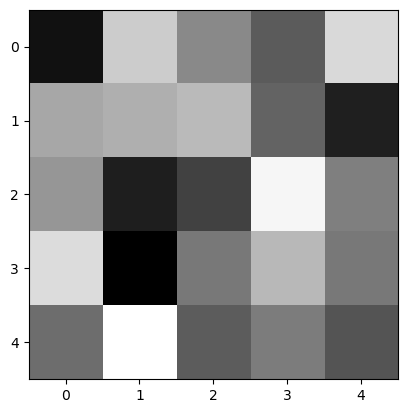

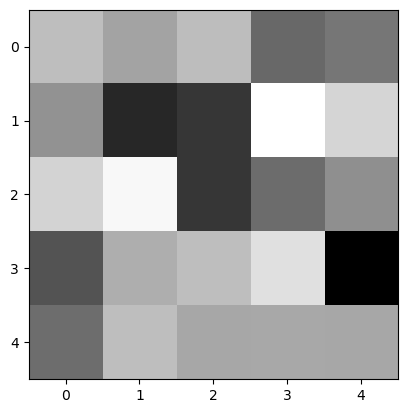

In [42]:
import matplotlib.pyplot as plt
import torch

# Modelin birinci qatının konvolyusiya çəki dəyərlərini əldə edir
kernels = model.conv1.weight.data.numpy()

# Hər bir kernelin təsvirini çəkir
for i in range(kernels.shape[0]):
    plt.imshow(kernels[i, 0, :, :], cmap='gray')
    plt.show()
    if i==1:
        break

### Metrics

In [17]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score,\
                                                                                                    confusion_matrix

model.eval() # Modeli qiymətləndirmə rejiminə keçirir
all_labels = [] # Test dəstindəki həqiqi etiketləri saxlamaq üçün boş siyahı
all_predictions = [] # Modelin təxmin etdiyi etiketləri saxlamaq üçün boş siyahı

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images) # Test məlumatlarını modeldən keçirir
        _, predicted = torch.max(outputs, 1) # Hər bir nümunə üçün ehtimalı ən yüksək olan sinifi seçir
        all_labels.extend(labels.cpu().numpy()) # Həqiqi etiketləri siyahıya əlavə edir
        all_predictions.extend(predicted.cpu().numpy()) # Təxminləri siyahıya əlavə edir

# Metrikləri hesablamaq
accuracy = accuracy_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_predictions)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(all_labels, all_predictions))

Accuracy: 90.82%
F1 Score: 0.91
Recall: 0.91
Precision: 0.91
Confusion Matrix:
 [[802   0  10  24   7   0 146   0  11   0]
 [  2 972   0  17   1   0   5   0   3   0]
 [ 13   0 821  11  56   0  98   0   1   0]
 [  6   1   3 937  24   0  23   0   6   0]
 [  0   2  64  28 828   0  76   0   2   0]
 [  0   0   0   0   0 975   0  15   0  10]
 [ 64   0  36  29  40   0 822   0   9   0]
 [  0   0   0   0   0   4   0 979   1  16]
 [  2   0   0   3   0   0   2   1 991   1]
 [  0   0   0   0   0   6   1  38   0 955]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.88      0.82      0.85      1000
           3       0.89      0.94      0.91      1000
           4       0.87      0.83      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.70      0.82      0.76      1000
           7       0.95      0.

## Forecast

In [18]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# FashionMNIST sinif adları
class_names = torchvision.datasets.FashionMNIST.classes

# Şəkli yükləyin və modelin gözlədiyi ölçüyə və formata çevirin
image_path = r"C:\Users\dell\Desktop\Python\week11\sample_image-300x300.png"  # Yeni şəkilinizin fayl yolu
image = Image.open(image_path).convert("L")  # Gri tonlara çevir
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Modelin gözlədiyi ölçüyə çevirir
    transforms.ToTensor(),        # Tensora çevirir
    transforms.Normalize((0.5,), (0.5,))  # Eyni normalizasiya tətbiq edir
])

# Şəkli tensora çevir və batch boyutunu (1, 1, 28, 28) kimi göstər
image_tensor = transform(image).unsqueeze(0)

# Modelin proqnozunu alın
model.eval()
with torch.no_grad():
    output = model(image_tensor)
    _, predicted_class = torch.max(output, 1)

       
# Proqnoz nəticəsini sinif adı ilə göstər
predicted_class_name = class_names[predicted_class.item()]
print(f"Modelin proqnozu: Sinif: {predicted_class.item()} ; Adı: {predicted_class_name}")

Modelin proqnozu: Sinif: 2 ; Adı: Pullover


### Check Forecast

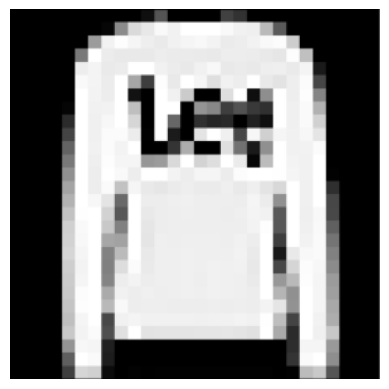

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

# Şəkili açın və göstərmək üçün plt.imshow funksiyasına verin
image_path = r"C:\Users\dell\Desktop\Python\week11\sample_image-300x300.png"
image = Image.open(image_path)

plt.imshow(image)
plt.axis("off")  # Oxları gizlətmək üçün
plt.show()